In this section, we explore how to download data from the renowned COCO dataset. To view the available datasets, one must visit the [official website](https://cocodataset.org/#download). We will opt for the 2017 version as it is the most commonly used.

For 2017, we have access to data and labels for the training and validation sets. In the case of the test set, labels are not available. Therefore, we will not download these data for now.

In [1]:
import requests
import os
import zipfile

In [2]:
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

def download_file(url, target_path):
    # Verificar y crear directorio si es necesario
    ensure_dir(target_path)
    # Descargar el archivo desde `url` y guardar en `target_path`
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(target_path, 'wb') as f:
            for chunk in response.iter_content(4096):
                f.write(chunk)
    print(f"Descargado: {target_path}")

def unzip_file(zip_path):
    print(zip_path)
    # Abrir el archivo ZIP y extraer su contenido
    extract_to = os.path.dirname(zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Descomprimido: {zip_path}")

In [3]:
# URLs para descargar los datos
base_url = "http://images.cocodataset.org/"
image_train_url = base_url + "zips/train2017.zip"
image_val_url = base_url + "zips/val2017.zip"
annotation_train_val_url = base_url + "annotations/annotations_trainval2017.zip"

In [4]:
# Rutas para guardar los archivos descargados
data_folder = "datasets/COCO2017/"
train_path = data_folder + "train2017.zip"
val_path = data_folder + "val2017.zip"
annotations_train_val_path = data_folder + "annotations_trainval2017.zip"

In [5]:
# Descargar imágenes y anotaciones de entrenamiento y validación
download_file(image_train_url, train_path)
download_file(image_val_url, val_path)
download_file(annotation_train_val_url, annotations_train_val_path)

Descargado: datasets/COCO2017/train2017.zip
Descargado: datasets/COCO2017/val2017.zip
Descargado: datasets/COCO2017/annotations_trainval2017.zip


In [6]:
# Descomprimir anotaciones de entrenamiento, validación
unzip_file(train_path)
unzip_file(val_path)
unzip_file(annotations_train_val_path)

datasets/COCO2017/train2017.zip
Descomprimido: datasets/COCO2017/train2017.zip
datasets/COCO2017/val2017.zip
Descomprimido: datasets/COCO2017/val2017.zip
datasets/COCO2017/annotations_trainval2017.zip
Descomprimido: datasets/COCO2017/annotations_trainval2017.zip


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import json
import os

In [8]:
# Ruta al archivo JSON de anotaciones COCO
json_file = 'datasets/COCO2017/annotations/instances_train2017.json'  # Asegúrate de cambiar esto a tu ruta correcta

# Cargar el contenido del archivo JSON
with open(json_file) as f:
    data = json.load(f)

In [9]:
# Extraer información de imágenes y anotaciones
images_df = pd.DataFrame(data['images'])
images_df.head()

license         file_name  \
0        3  000000391895.jpg   
1        4  000000522418.jpg   
2        3  000000184613.jpg   
3        3  000000318219.jpg   
4        3  000000554625.jpg   

                                            coco_url  height  width  \
0  http://images.cocodataset.org/train2017/000000...     360    640   
1  http://images.cocodataset.org/train2017/000000...     480    640   
2  http://images.cocodataset.org/train2017/000000...     336    500   
3  http://images.cocodataset.org/train2017/000000...     640    556   
4  http://images.cocodataset.org/train2017/000000...     640    426   

         date_captured                                         flickr_url  \
0  2013-11-14 11:18:45  http://farm9.staticflickr.com/8186/8119368305_...   
1  2013-11-14 11:38:44  http://farm1.staticflickr.com/1/127244861_ab0c...   
2  2013-11-14 12:36:29  http://farm3.staticflickr.com/2169/2118578392_...   
3  2013-11-14 13:02:53  http://farm5.staticflickr.com/4125/5094763076_...   
4  2013-11-14 16:03:19  http://farm5.staticflickr.com/4086/5094162993_...   

       id  
0  391895  
1  522418  
2  184613  
3  318219  
4  554625

In [10]:
annotations_df = pd.DataFrame(data['annotations'])
annotations_df.head()

segmentation        area  iscrowd  \
0  [[239.97, 260.24, 222.04, 270.49, 199.84, 253....  2765.14865        0   
1  [[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...  1545.42130        0   
2  [[274.58, 405.68, 298.32, 405.68, 302.45, 402....  5607.66135        0   
3  [[296.65, 388.33, 296.65, 388.33, 297.68, 388....     0.00000        0   
4  [[251.87, 356.13, 260.13, 343.74, 300.39, 335....   800.41325        0   

   image_id                             bbox  category_id    id  
0    558840   [199.84, 200.46, 77.71, 70.88]           58   156  
1    200365  [234.22, 317.11, 149.39, 38.55]           58   509  
2    200365   [239.48, 347.87, 160.0, 57.81]           58   603  
3    200365      [296.65, 388.33, 1.03, 0.0]           58   918  
4    200365  [251.87, 333.42, 125.94, 22.71]           58  1072

In [11]:
categories_df = pd.DataFrame(data['categories'])
categories_df.head()

supercategory  id        name
0        person   1      person
1       vehicle   2     bicycle
2       vehicle   3         car
3       vehicle   4  motorcycle
4       vehicle   5    airplane

In [12]:
widths = images_df.set_index('id')['width'].to_dict()
heights = images_df.set_index('id')['height'].to_dict()
filenames = images_df.set_index('id')['file_name'].to_dict()
names = categories_df.set_index('id')['name'].to_dict()
supercategories = categories_df.set_index('id')['supercategory'].to_dict()

coco_train17_df = annotations_df.copy()
coco_train17_df['width_img'] = coco_train17_df['image_id'].map(widths)
coco_train17_df['height_img'] = coco_train17_df['image_id'].map(heights)
coco_train17_df['file_name'] = coco_train17_df['image_id'].map(filenames)
coco_train17_df['category_name'] = coco_train17_df['category_id'].map(names)
coco_train17_df['supercategory_name'] = coco_train17_df['category_id'].map(supercategories)

coco_train17_df.head()

segmentation        area  iscrowd  \
0  [[239.97, 260.24, 222.04, 270.49, 199.84, 253....  2765.14865        0   
1  [[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...  1545.42130        0   
2  [[274.58, 405.68, 298.32, 405.68, 302.45, 402....  5607.66135        0   
3  [[296.65, 388.33, 296.65, 388.33, 297.68, 388....     0.00000        0   
4  [[251.87, 356.13, 260.13, 343.74, 300.39, 335....   800.41325        0   

   image_id                             bbox  category_id    id  width_img  \
0    558840   [199.84, 200.46, 77.71, 70.88]           58   156        640   
1    200365  [234.22, 317.11, 149.39, 38.55]           58   509        640   
2    200365   [239.48, 347.87, 160.0, 57.81]           58   603        640   
3    200365      [296.65, 388.33, 1.03, 0.0]           58   918        640   
4    200365  [251.87, 333.42, 125.94, 22.71]           58  1072        640   

   height_img         file_name category_name supercategory_name  
0         427  000000558840.jpg       hot dog               food  
1         480  000000200365.jpg       hot dog               food  
2         480  000000200365.jpg       hot dog               food  
3         480  000000200365.jpg       hot dog               food  
4         480  000000200365.jpg       hot dog               food

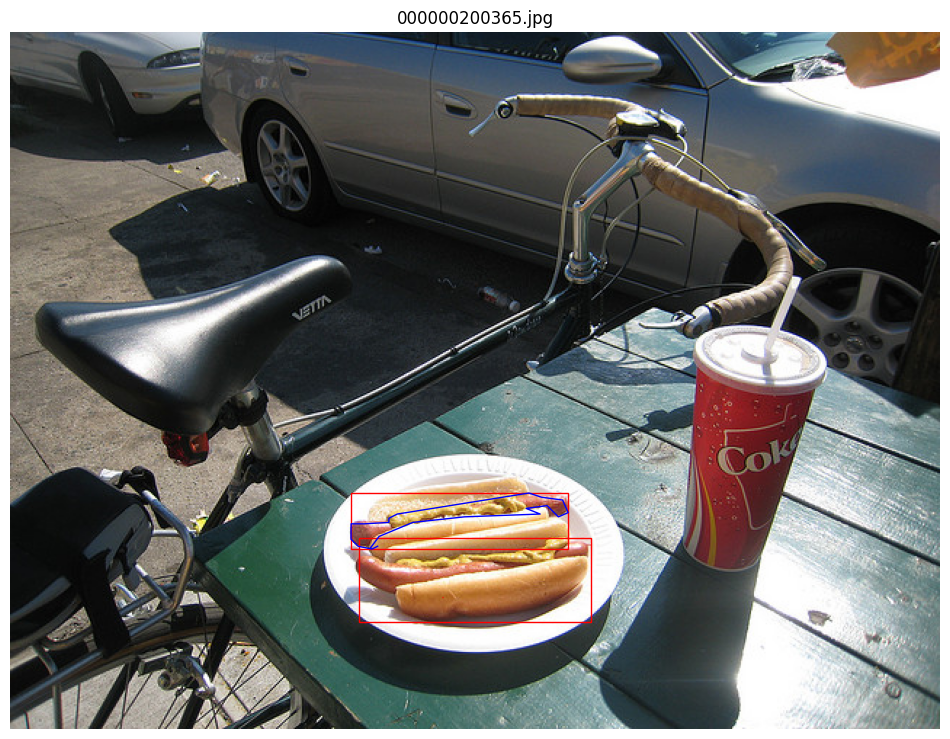

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread

def plot_image_with_annotations(path, filename, rectangles=None, segmentations=None, figsize=(10, 8), title=None):
    """
    Carga y muestra una imagen usando solo Matplotlib, dibujando rectángulos y segmentaciones definidas por el usuario.
    
    Parámetros:
    - path (str): El camino hacia el directorio donde se encuentra la imagen.
    - filename (str): El nombre del archivo de la imagen.
    - rectangles (list of tuples): Lista de tuplas (x, y, w, h) para dibujar rectángulos en la imagen.
    - segmentations (list of list of floats): Lista que contiene puntos de contorno intercalados [x1, y1, x2, y2, ...].
    - figsize (tuple): Tamaño de la figura (opcional).
    - title (str): Título de la imagen (opcional).
    """
    # Construye la ruta completa de la imagen
    full_path = f"{path}/{filename}"
    
    # Carga la imagen con Matplotlib
    img = imread(full_path)
    
    # Crea la figura y el eje
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.axis('off')  # Desactiva los ejes
    
    # Dibuja los rectángulos si se proporcionaron
    if rectangles:
        for (x, y, w, h) in rectangles:
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    
    # Dibuja los contornos de segmentación si se proporcionaron
    if segmentations:
        for seg in segmentations:
            # Transforma la lista plana en una lista de tuplas (x, y)
            points = [(seg[i], seg[i + 1]) for i in range(0, len(seg), 2)]
            x, y = zip(*points)  # Desempaqueta la lista de tuplas
            ax.plot(x, y, 'b-', linewidth=1)  # Dibuja el contorno
    
    # Configura el título, si se proporcionó
    if title:
        ax.set_title(title)
    
    # Muestra la imagen
    plt.show()



plot_image_with_annotations('datasets/COCO2017/train2017/', '000000200365.jpg',
                            segmentations=[[247.71, 354.7, 253.49, 346.99, 276.63, 337.35, 312.29, 333.49, 364.34, 331.57, 354.7, 327.71, 369.16, 325.78, 376.87, 333.49, 383.61, 330.6, 379.76, 321.93, 365.3, 320.0, 356.63, 317.11, 266.02, 331.57, 260.24, 334.46, 260.24, 337.35, 242.89, 338.31, 234.22, 338.31, 234.22, 348.92, 239.04, 353.73, 248.67, 355.66, 252.53, 353.73]],
                            rectangles=[[234.22, 317.11, 149.39, 38.55], [239.48, 347.87, 160.0, 57.81], [296.65, 388.33, 1.03, 0.0]],
                            figsize=(12, 10),
                            title='000000200365.jpg')

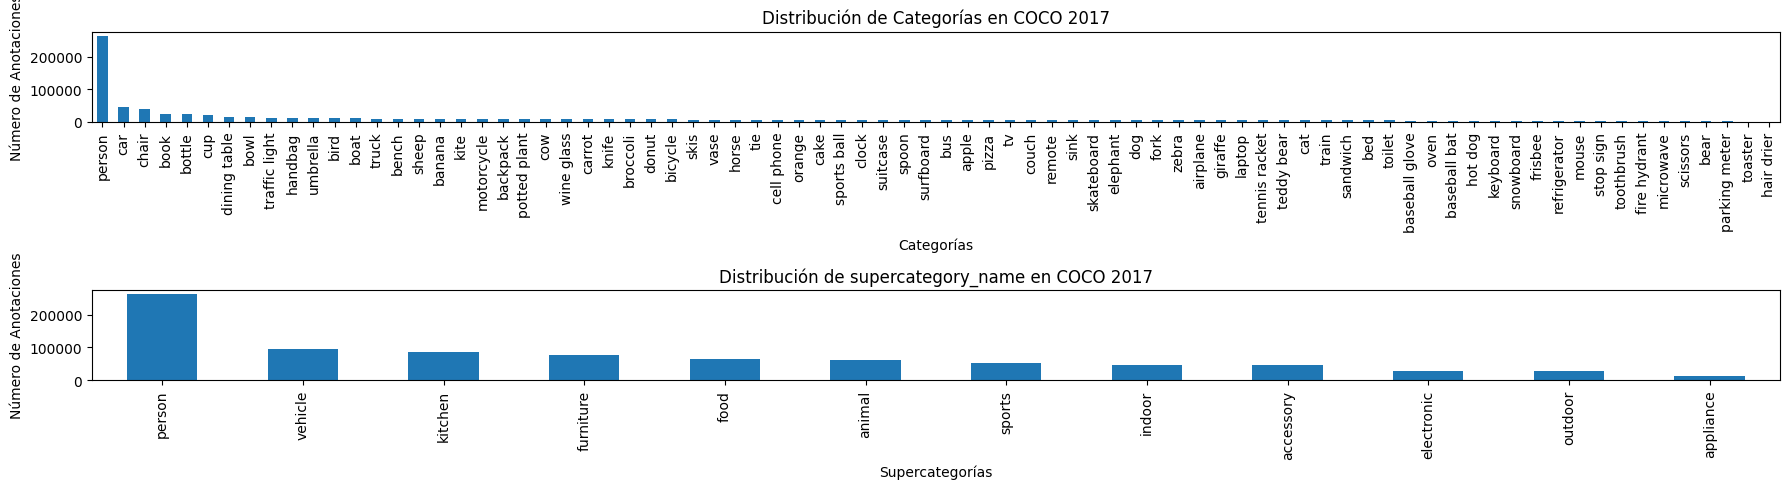

In [14]:
# Crear una figura con 2 subplots, uno encima del otro
fig, axs = plt.subplots(2, 1, figsize=(18, 5))  # Ajusta el tamaño según sea necesario

# Graficar la distribución de categorías en el primer subplot
coco_train17_df['category_name'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribución de Categorías en COCO 2017')
axs[0].set_xlabel('Categorías')
axs[0].set_ylabel('Número de Anotaciones')

# Graficar la distribución de supercategorías en el segundo subplot
coco_train17_df['supercategory_name'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribución de supercategory_name en COCO 2017')
axs[1].set_xlabel('Supercategorías')
axs[1].set_ylabel('Número de Anotaciones')

# Ajustar el layout para evitar la superposición de contenido
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random

def plot_random_images_by_category(df, category_name, image_folder_path, num_images=5):
    """
    Muestra imágenes aleatorias de una categoría específica en un DataFrame.
    
    Parámetros:
    - df (DataFrame): DataFrame que contiene los metadatos de las imágenes.
    - category_name (str): Nombre de la categoría para filtrar las imágenes.
    - image_folder_path (str): Ruta del directorio donde se almacenan las imágenes.
    - num_images (int): Número de imágenes aleatorias a mostrar.
    """
    # Filtrar el DataFrame por la categoría deseada
    filtered_df = df[df['category_name'] == category_name]
    
    # Seleccionar aleatoriamente 'num_images' entradas
    if len(filtered_df) > num_images:
        sampled_df = filtered_df.sample(n=num_images)
    else:
        sampled_df = filtered_df
    
    # Configurar la figura para mostrar las imágenes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))
    for ax, (_, row) in zip(axes, sampled_df.iterrows()):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(image_folder_path, row['file_name'])
        
        # Cargar y mostrar la imagen
        image = imread(image_path)
        ax.imshow(image)
        ax.axis('off')  # Ocultar los ejes
        ax.set_title(f'ID: {row["id"]}\n{category_name}')
    
    plt.tight_layout()
    plt.show()

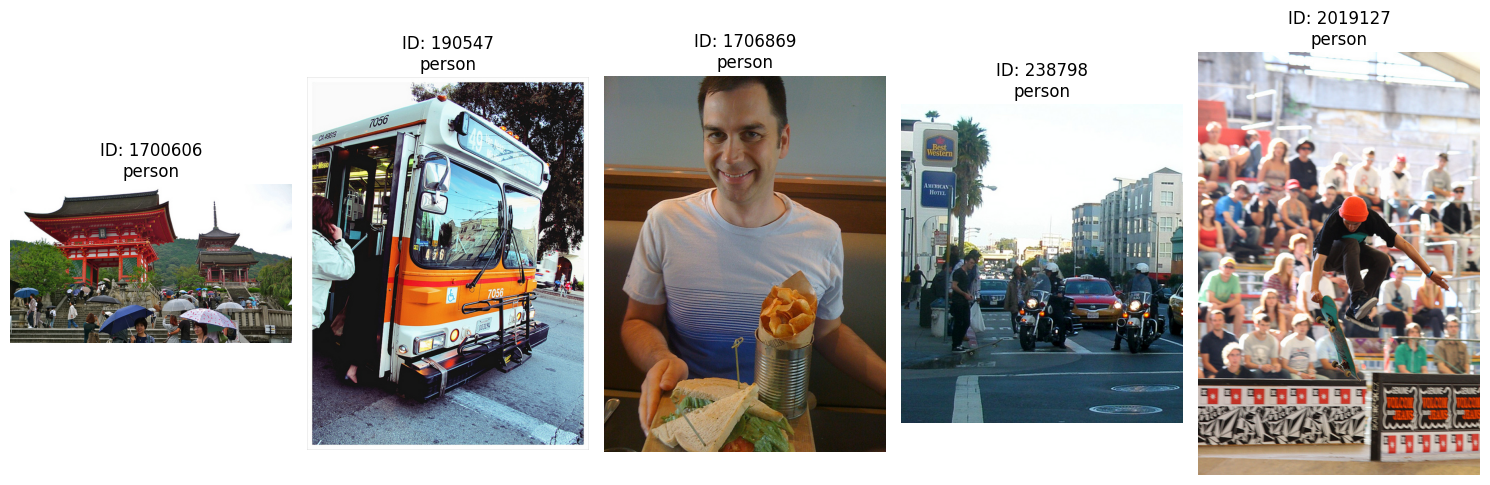

In [16]:
# Ejemplo de uso
category_to_display = 'person'  # Cambia esto por la categoría que desees
image_folder = 'datasets/COCO2017/train2017'
plot_random_images_by_category(coco_train17_df, category_to_display, image_folder)

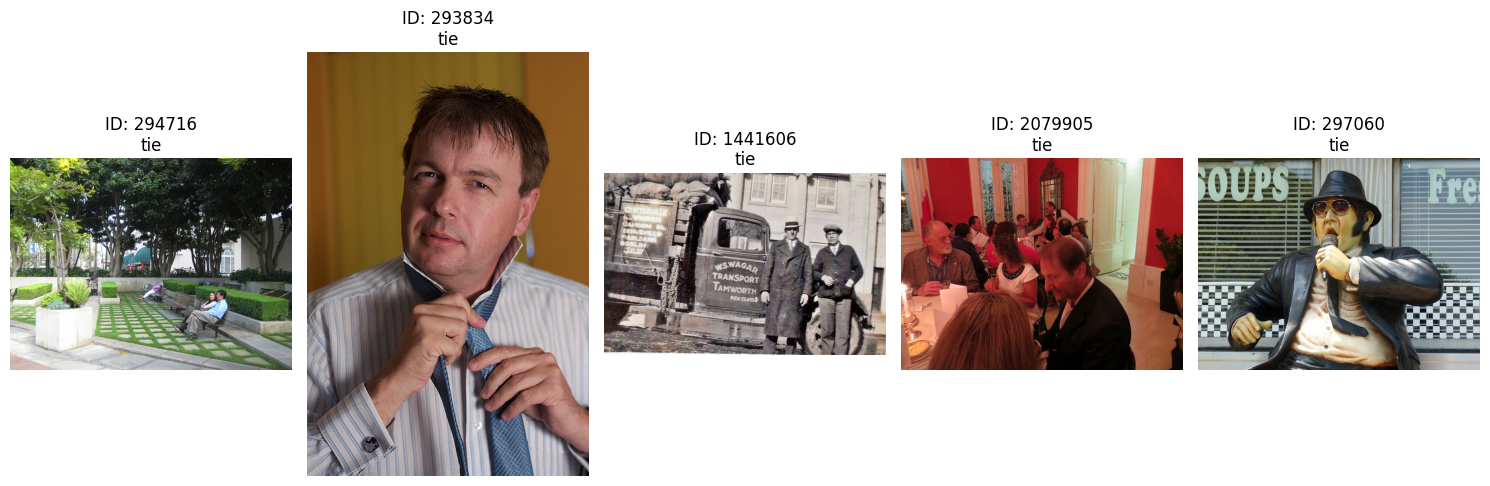

In [17]:
# Ejemplo de uso
category_to_display = 'tie'  # Cambia esto por la categoría que desees
image_folder = 'datasets/COCO2017/train2017'
plot_random_images_by_category(coco_train17_df, category_to_display, image_folder)

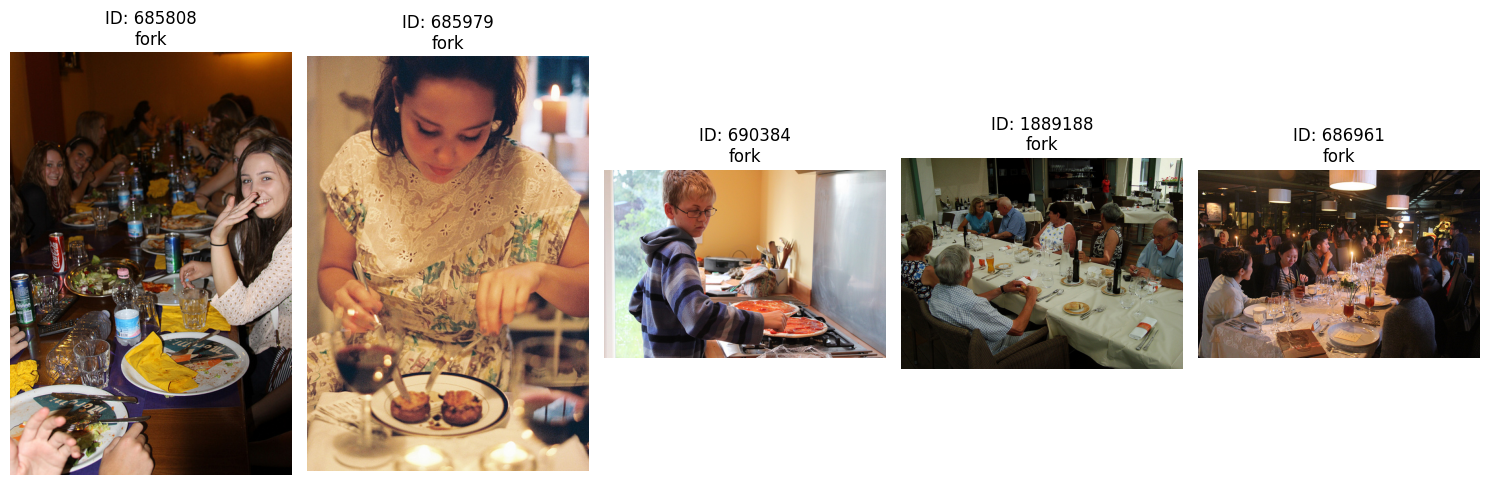

In [19]:
# Ejemplo de uso
category_to_display = 'fork'  # Cambia esto por la categoría que desees
image_folder = 'datasets/COCO2017/train2017'
plot_random_images_by_category(coco_train17_df, category_to_display, image_folder)

In [20]:
import os
import shutil

for folder in ['train2017', 'val2017']:
    folder_path = f'datasets/COCO2017/{folder}'
    subfolder_path = os.path.join(folder_path, 'images')
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)
    # Recorrer todos los archivos en la carpeta original
    for filename in os.listdir(folder_path):
        # Comprobar si el archivo es una imagen
        if any(filename.lower().endswith(ext) for ext in {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}):
            # Ruta completa del archivo original
            original_path = os.path.join(folder_path, filename)
            
            # Ruta completa de la nueva ubicación del archivo
            new_path = os.path.join(subfolder_path, filename)
            
            # Mover el archivo
            shutil.move(original_path, new_path)

In [21]:
def normalize_bbox(row):
    # Extraer los valores individuales
    x, y, w, h = row['bbox']
    width_img = row['width_img']
    height_img = row['height_img']
    
    # Normalizar las coordenadas
    normalized_x = x / width_img
    normalized_y = y / height_img
    normalized_w = w / width_img
    normalized_h = h / height_img
    
    return [normalized_x, normalized_y, normalized_w, normalized_h]

In [32]:
fdf = coco_train17_df.copy()

# Crear una nueva columna con las coordenadas normalizadas
fdf['normalized_bbox'] = fdf.apply(normalize_bbox, axis=1)

# Paso 1: Identificar valores únicos y ordenarlos
unique_ids = sorted(fdf['category_id'].unique())

# Paso 2: Crear un mapeo de los valores originales
mapping = {old_id: new_id for new_id, old_id in enumerate(unique_ids)}

# Paso 3: Aplicar el mapeo al DataFrame
fdf['category_id_modified'] = fdf['category_id'].map(mapping)

# Paso 4. Crear una lista combinada de category_id y bbox
fdf['category_bbox'] = fdf.apply(lambda row: [row['category_id_modified']] + row['normalized_bbox'], axis=1)

# Paso 5. Agrupar por 'filename' y agregar todas las 'bbox' en listas
grouped = fdf.groupby('file_name')['category_bbox'].agg(list).to_dict()

In [33]:
# Directorio donde se guardarán los archivos
output_directory = 'datasets/COCO2017/train2017/labels'
os.makedirs(output_directory, exist_ok=True)  # Asegurarse de que el directorio existe

for filename, boxes in grouped.items():
    # Extraer el nombre del archivo sin la extensión y crear un archivo txt con ese nombre
    name_without_extension = filename.split('.')[0]
    output_file_path = os.path.join(output_directory, f"{name_without_extension}.txt")
    
    with open(output_file_path, 'w') as file:
        # Escribir cada bounding box en una nueva línea
        for box in boxes:
            # Convertir cada elemento de la sublista a string y unir con comas
            box_str = ' '.join(map(str, box))
            file.write(f"{box_str}\n")

In [34]:
# Ruta al archivo JSON de anotaciones COCO
json_file = 'datasets/COCO2017/annotations/instances_val2017.json'  # Asegúrate de cambiar esto a tu ruta correcta

# Cargar el contenido del archivo JSON
with open(json_file) as f:
    data = json.load(f)

images_df = pd.DataFrame(data['images'])
annotations_df = pd.DataFrame(data['annotations'])
categories_df = pd.DataFrame(data['categories'])

widths = images_df.set_index('id')['width'].to_dict()
heights = images_df.set_index('id')['height'].to_dict()
filenames = images_df.set_index('id')['file_name'].to_dict()
names = categories_df.set_index('id')['name'].to_dict()
supercategories = categories_df.set_index('id')['supercategory'].to_dict()

coco_val17_df = annotations_df.copy()
coco_val17_df['width_img'] = coco_val17_df['image_id'].map(widths)
coco_val17_df['height_img'] = coco_val17_df['image_id'].map(heights)
coco_val17_df['file_name'] = coco_val17_df['image_id'].map(filenames)
coco_val17_df['category_name'] = coco_val17_df['category_id'].map(names)
coco_val17_df['supercategory_name'] = coco_val17_df['category_id'].map(supercategories)

In [35]:
# Crear una nueva columna con las coordenadas normalizadas
coco_val17_df['normalized_bbox'] = coco_val17_df.apply(normalize_bbox, axis=1)

# # Paso 1: Identificar valores únicos y ordenarlos
# unique_ids = sorted(coco_val17_df['category_id'].unique())

# # Paso 2: Crear un mapeo de los valores originales
# mapping = {old_id: new_id for new_id, old_id in enumerate(unique_ids)}

# Paso 3: Aplicar el mapeo al DataFrame
coco_val17_df['category_id_modified'] = coco_val17_df['category_id'].map(mapping)

# Paso 4. Crear una lista combinada de category_id y bbox
coco_val17_df['category_bbox'] = coco_val17_df.apply(lambda row: [row['category_id_modified']] + row['normalized_bbox'], axis=1)

# Paso 5. Agrupar por 'filename' y agregar todas las 'bbox' en listas
grouped = coco_val17_df.groupby('file_name')['category_bbox'].agg(list).to_dict()

#
# Directorio donde se guardarán los archivos
output_directory = 'datasets/COCO2017/val2017/labels'
os.makedirs(output_directory, exist_ok=True)  # Asegurarse de que el directorio existe

for filename, boxes in grouped.items():
    # Extraer el nombre del archivo sin la extensión y crear un archivo txt con ese nombre
    name_without_extension = filename.split('.')[0]
    output_file_path = os.path.join(output_directory, f"{name_without_extension}.txt")
    
    with open(output_file_path, 'w') as file:
        # Escribir cada bounding box en una nueva línea
        for box in boxes:
            # Convertir cada elemento de la sublista a string y unir con comas
            box_str = ' '.join(map(str, box))
            file.write(f"{box_str}\n")


In [36]:
import yaml

# Necesitamos invertir mapping para luego crear el diccionario con ids corregidos y etiquetas
inv = {value: str(key) for key, value in mapping.items()}
new_dict = {k: names[int(v)] for k, v in inv.items() if int(v) in names}

yaml_content = {
    'path': os.path.join(os.getcwd(), 'datasets/COCO2017'),
    'train': "train2017/images",
    'val': "val2017/images",
    'names': new_dict
}
# Crear o modificar el archivo YAML
with open('datasets/COCO2017/config.yaml', 'w') as yaml_file:
    yaml.dump(yaml_content, yaml_file, default_flow_style=False)